### 비디오 처리

#### 필요한 라이브러리 임포트

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets 
import IPython.display as display
from ipywidgets import Layout, Button, Box, Layout, Image, IntSlider, AppLayout
import matplotlib.animation as animation

### 평균 배경 차영상

In [3]:
cap = cv2.VideoCapture('./data/vtest.avi')
if(not cap.isOpened()):
    print('Error opening video')

height,width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))

acc_gray = np.zeros(shape=(height,width),dtype=np.float32)
acc_bgr = np.zeros(shape=(height,width,3),dtype=np.float32)
t=0

wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="30%") 
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width="30%") 
wImg3 = widgets.Image(layout = widgets.Layout(border="solid"), width="30%") 

items = [wImg1, wImg2, wImg3]
box = Box(children=items)

display.display(box)

while True:
    try:
        retval, frame = cap.read()
        if not retval:
            break
        t+=1
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        
        cv2.accumulate(gray,acc_gray)
        avg_gray = acc_gray/t
        dst_gray = cv2.convertScaleAbs(avg_gray)
        
        cv2.accumulate(frame,acc_bgr)
        avg_bgr = acc_bgr/t
        dst_bgr = cv2.convertScaleAbs(avg_bgr)
        
        wImg1.value = cv2.imencode(".jpeg", frame)[1].tostring()
        wImg2.value = cv2.imencode(".jpeg", dst_gray)[1].tostring()
        wImg3.value = cv2.imencode(".jpeg", dst_bgr)[1].tostring()
    
    except KeyboardInterrupt:
        break
        
if cap.isOpened():
    cap.release()

cv2.imwrite('./data/avg_gray.png',dst_gray)
cv2.imwrite('./data/avg_bgr.png',dst_bgr)

Box(children=(Image(value=b'', layout="Layout(border='solid')", width='30%'), Image(value=b'', layout="Layout(…

True

In [4]:
cap = cv2.VideoCapture('./data/vtest.avi')
if(not cap.isOpened()):
    print('Error opening video')

height,width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
t=0
TH = 40 #Binary Threshold
AREA_TH = 80 #Area Threshold
bkg_gray = cv2.imread('./data/avg_gray.png',cv2.IMREAD_GRAYSCALE)
bkg_bgr = cv2.imread('./data/avg_bgr.png')

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE

wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="20%") 
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width="20%") 
wImg3 = widgets.Image(layout = widgets.Layout(border="solid"), width="20%") 
wImg4 = widgets.Image(layout = widgets.Layout(border="solid"), width="20%")

items = [wImg1, wImg2, wImg3, wImg4]
box = Box(children=items)

display.display(box)

while True:
    try:
        retval, frame = cap.read()
        if not retval:
            break
        t+=1
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        
        diff_gray = cv2.absdiff(gray,bkg_gray)
        diff_bgr = cv2.absdiff(frame,bkg_bgr)
        
        db,dg,dr = cv2.split(diff_bgr)
        ret,bb = cv2.threshold(db,TH,255,cv2.THRESH_BINARY)
        ret,bg = cv2.threshold(dg,TH,255,cv2.THRESH_BINARY)
        ret,br = cv2.threshold(dr,TH,255,cv2.THRESH_BINARY)
        
        bImage = cv2.bitwise_or(bb,bg)
        bImage = cv2.bitwise_or(br,bImage)
        bImage = cv2.erode(bImage,None,5)
        bImage = cv2.dilate(bImage,None,5)
        bImage = cv2.erode(bImage,None,7)
        
        image,contours,hierarchy = cv2.findContours(bImage,mode,method)
        cv2.drawContours(frame,contours,-1,(255,0,0),1)
        
        for i,cnt in enumerate(contours):
            area = cv2.contourArea(cnt)
            if area>AREA_TH:
                x,y,width,height = cv2.boundingRect(cnt)
                cv2.rectangle(frame,(x,y),(x+width,y+height),(0,0,255),2)
        
        wImg1.value = cv2.imencode(".jpeg", frame)[1].tostring()
        wImg2.value = cv2.imencode(".jpeg", bImage)[1].tostring()
        wImg3.value = cv2.imencode(".jpeg", diff_gray)[1].tostring()
        wImg4.value = cv2.imencode(".jpeg", diff_bgr)[1].tostring()
    
    except KeyboardInterrupt:
        break
        
if cap.isOpened():
    cap.release()

Box(children=(Image(value=b'', layout="Layout(border='solid')", width='20%'), Image(value=b'', layout="Layout(…

In [5]:
cap = cv2.VideoCapture('./data/vtest.avi')
if(not cap.isOpened()):
    print('Error opening video')

height,width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
t=0
TH = 40 #Binary Threshold
AREA_TH = 80 #Area Threshold
acc_bgr = np.zeros(shape=(height,width,3),dtype=np.float32)

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE

wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="20%") 
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width="20%") 
wImg3 = widgets.Image(layout = widgets.Layout(border="solid"), width="20%") 
wImg4 = widgets.Image(layout = widgets.Layout(border="solid"), width="20%")

items = [wImg1, wImg2, wImg3, wImg4]
box = Box(children=items)

display.display(box)

while True:
    try:
        retval, frame = cap.read()
        if not retval:
            break
        t+=1
        blur = cv2.GaussianBlur(frame,(5,5),0.0)
        
        if t<50:
            cv2.accumulate(blur,acc_bgr)
            continue
        elif t ==50:
            bkg_bgr = acc_bgr/t
        
        diff_bgr = cv2.absdiff(np.float32(blur),bkg_bgr).astype(np.uint8)
        db,dg,dr = cv2.split(diff_bgr)
        
        ret,bb = cv2.threshold(db,TH,255,cv2.THRESH_BINARY)
        ret,bg = cv2.threshold(dg,TH,255,cv2.THRESH_BINARY)
        ret,br = cv2.threshold(dr,TH,255,cv2.THRESH_BINARY)
        
        bImage = cv2.bitwise_or(bb,bg)
        bImage = cv2.bitwise_or(br,bImage)
        bImage = cv2.erode(bImage,None,5)
        bImage = cv2.dilate(bImage,None,5)
        bImage = cv2.erode(bImage,None,7)
        
        msk = bImage.copy()
        
        image,contours,hierarchy = cv2.findContours(bImage,mode,method)
        cv2.drawContours(frame,contours,-1,(255,0,0),1)
        
        for i,cnt in enumerate(contours):
            area = cv2.contourArea(cnt)
            if area>AREA_TH:
                x,y,width,height = cv2.boundingRect(cnt)
                cv2.rectangle(frame,(x,y),(x+width,y+height),(0,0,255),2)
                cv2.rectangle(msk,(x,y),(x+width,y+height),255,-1)
        msk = cv2.bitwise_not(msk)
        cv2.accumulateWeighted(blur,bkg_bgr,alpha=0.1,mask=msk)
        
        wImg1.value = cv2.imencode(".jpeg", frame)[1].tostring()
        wImg2.value = cv2.imencode(".jpeg", bImage)[1].tostring()
        wImg3.value = cv2.imencode(".jpeg", np.uint8(bkg_bgr))[1].tostring()
        wImg4.value = cv2.imencode(".jpeg", diff_bgr)[1].tostring()
    
    except KeyboardInterrupt:
        break
        
if cap.isOpened():
    cap.release()

Box(children=(Image(value=b'', layout="Layout(border='solid')", width='20%'), Image(value=b'', layout="Layout(…

In [6]:
cap = cv2.VideoCapture('./data/vtest.avi')
if(not cap.isOpened()):
    print('Error opening video')

height,width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
t=0
AREA_TH = 80 #Area Threshold
bgMog1 = cv2.createBackgroundSubtractorMOG2()
bgMog2 = cv2.createBackgroundSubtractorMOG2(varThreshold=25, detectShadows=False)
bgMog3 = cv2.createBackgroundSubtractorKNN()
bgMog4 = cv2.createBackgroundSubtractorKNN(dist2Threshold=1000,detectShadows=False)

wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="40%") 
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width="40%") 
wImg3 = widgets.Image(layout = widgets.Layout(border="solid"), width="40%") 
wImg4 = widgets.Image(layout = widgets.Layout(border="solid"), width="40%")
wImg5 = widgets.Image(layout = widgets.Layout(border="solid"), width="40%") 
wImg6 = widgets.Image(layout = widgets.Layout(border="solid"), width="40%") 
wImg7 = widgets.Image(layout = widgets.Layout(border="solid"), width="40%") 
wImg8 = widgets.Image(layout = widgets.Layout(border="solid"), width="40%")

items = [wImg1, wImg2]
box1 = Box(children=items)
items = [wImg3, wImg4]
box2 = Box(children=items)
items = [wImg5, wImg6]
box3 = Box(children=items)
items = [wImg7, wImg8]
box4 = Box(children=items)

display.display(box1)
display.display(box2)
display.display(box3)
display.display(box4)

def findObjectAndDraw(bImage,src):
    res = src.copy()
    bImage = cv2.erode(bImage,None,5)
    bImage = cv2.dilate(bImage,None,5)
    bImage = cv2.erode(bImage,None,7)
    image,contours,hierarchy = cv2.findContours(bImage,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(frame,contours,-1,(255,0,0),1)
    for i,cnt in enumerate(contours):
        area = cv2.contourArea(cnt)
        if area>AREA_TH:
            x,y,width,height = cv2.boundingRect(cnt)
            cv2.rectangle(res,(x,y),(x+width,y+height),(0,0,255),2)
    return res

while True:
    try:
        retval, frame = cap.read()
        if not retval:
            break
        t+=1
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(frame,(5,5),0.0)
        
        bImage1 = bgMog1.apply(blur)
        bImage2 = bgMog2.apply(blur)
        bImage3 = bgMog3.apply(blur)
        bImage4 = bgMog4.apply(blur)
        dst1 = findObjectAndDraw(bImage1,frame)
        dst2 = findObjectAndDraw(bImage2,frame)
        dst3 = findObjectAndDraw(bImage3,frame)
        dst4 = findObjectAndDraw(bImage4,frame)
        
        
        wImg1.value = cv2.imencode(".jpeg", bImage1)[1].tostring()
        wImg2.value = cv2.imencode(".jpeg", dst1)[1].tostring()
        wImg3.value = cv2.imencode(".jpeg", bImage2)[1].tostring()
        wImg4.value = cv2.imencode(".jpeg", dst2)[1].tostring()
        wImg5.value = cv2.imencode(".jpeg", bImage3)[1].tostring()
        wImg6.value = cv2.imencode(".jpeg", dst3)[1].tostring()
        wImg7.value = cv2.imencode(".jpeg", bImage4)[1].tostring()
        wImg8.value = cv2.imencode(".jpeg", dst4)[1].tostring()
        
    
    except KeyboardInterrupt:
        break
        
if cap.isOpened():
    cap.release()

Box(children=(Image(value=b'', layout="Layout(border='solid')", width='40%'), Image(value=b'', layout="Layout(…

Box(children=(Image(value=b'', layout="Layout(border='solid')", width='40%'), Image(value=b'', layout="Layout(…

Box(children=(Image(value=b'', layout="Layout(border='solid')", width='40%'), Image(value=b'', layout="Layout(…

Box(children=(Image(value=b'', layout="Layout(border='solid')", width='40%'), Image(value=b'', layout="Layout(…

http://www.gisdeveloper.co.kr/?p=6855

In [7]:
cap = cv2.VideoCapture('./data/vtest.avi')
 
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.01,
                       minDistance = 30,
                       blockSize = 14)
 
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 0,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
 
# Create some random colors
color = np.random.randint(0,255,(100,3))
 
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
 
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
 
wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="40%") 
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width="40%") 

items = [wImg1, wImg2]
box = Box(children=items)
display.display(box)

while(True):
    try:
        ret,frame = cap.read()
 
        if not ret:
            break
 
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
        # calculate optical flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
 
        # Select good points
        good_new = p1[st==1]
        good_old = p0[st==1]
 
        # draw the tracks
        for i,(new,old) in enumerate(zip(good_new,good_old)):
            a,b = new.ravel()
            c,d = old.ravel()
            mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
            frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
        img = cv2.add(frame,mask)
         
        wImg1.value = cv2.imencode(".jpeg", frame)[1].tostring()
        wImg2.value = cv2.imencode(".jpeg", img)[1].tostring()
        
 
        # Now update the previous frame and previous points
        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1,1,2)
 
    except KeyboardInterrupt:
        break
        
if cap.isOpened():
    cap.release()

Box(children=(Image(value=b'', layout="Layout(border='solid')", width='40%'), Image(value=b'', layout="Layout(…

In [8]:
def drawFlow(img,flow,thresh=2,stride=8):
    h,w = img.shape[:2]
    mag,ang = cv2.cartToPolar(flow[...,0],flow[...,1])
    flow2 = np.int32(flow)
    for y in range(0,h,stride):
        for x in range(0,w,stride):
            dx,dy = flow2[y,x]
            if mag[y,x]>thresh:
                cv2.circle(img,(x,y),2,(0,255,0),-1)
                cv2.line(img,(x,y),(x+dx,y+dy),(255,0,0),1)
                
cap = cv2.VideoCapture('./data/vtest.avi')
if(not cap.isOpened()):
    print('Error opening video')

height,width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
t=0
hsv = np.zeros((height,width,3),dtype=np.uint8)
ret,frame = cap.read()
imgP = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

TH=2
AREA_TH=50
mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
params = dict(pyr_scale=0.5,levels=3,winsize=15,iterations=3,poly_n=5,poly_sigma=1.2,flags=0)

wImg = widgets.Image(layout = widgets.Layout(border="solid"), width="50%") 
display.display(wImg)

while True:
    try:
        retval, frame = cap.read()
        if not retval:
            break
        t+=1
        imgC = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        imgC = cv2.GaussianBlur(imgC,(5,5),0.5)
        
        flow = cv2.calcOpticalFlowFarneback(imgP,imgC,None,**params)
        drawFlow(frame,flow,TH)
        
        mag,ang = cv2.cartToPolar(flow[...,0],flow[...,1])
        ret,bImage = cv2.threshold(mag,TH,255,cv2.THRESH_BINARY)
        bImage = bImage.astype(np.uint8)
        image,contours,hierarchy = cv2.findContours(bImage,mode,method)
        for i,cnt in enumerate(contours):
            area = cv2.contourArea(cnt)
            if area > AREA_TH:
                x,y,width,height = cv2.boundingRect(cnt)
                cv2.rectangle(frame,(x,y),(x+width,y+height),(0,0,255),2)
                
        wImg.value = cv2.imencode(".jpeg", frame)[1].tostring()
        imgP = imgC.copy()
        
    except KeyboardInterrupt:
        break
        
if cap.isOpened():
    cap.release()

Image(value=b'', layout="Layout(border='solid')", width='50%')

In [48]:
class bbox_select():
    %matplotlib notebook
    def __init__(self,im):
        self.im = im
        self.selected_points = []
        self.fig,ax = plt.subplots()
        self.img = ax.imshow(self.im.copy())
        self.ka = self.fig.canvas.mpl_connect('button_press_event', self.onclick)
        disconnect_button = widgets.Button(description="Disconnect mpl")
        display.display(disconnect_button)
        disconnect_button.on_click(self.disconnect_mpl)
        
        
    def poly_img(self,img,pts):
        pts = np.array(pts, np.int32)
        pt1 = pts[0,0],pts[0,1]
        pt2 = pts[1,0],pts[1,1]
        
        cv2.rectangle(img,pt1,pt2,(np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)),7)
        return img

    def onclick(self, event):
        self.selected_points.append([event.xdata,event.ydata])
        
        if len(self.selected_points) == 2:
            self.fig
            self.img.set_data(self.poly_img(self.im.copy(),self.selected_points))
        
        elif len(self.selected_points) == 3:
            self.selected_points=[]
            self.selected_points.append([event.xdata,event.ydata])
                
            
    def disconnect_mpl(self,_):
        self.fig.canvas.mpl_disconnect(self.ka)

<IPython.core.display.Javascript object>


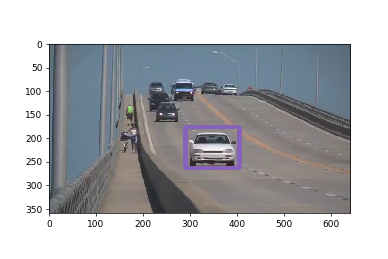

Button(description='Disconnect mpl', style=ButtonStyle())

In [96]:
cap = cv2.VideoCapture('./data/slow.mp4')
if(not cap.isOpened()):
    print('Error opening video')
ret,frame = cap.read()

frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
bs = bbox_select(frame)

In [97]:
print(bs.selected_points)

[x1,y1],[x2,y2] = bs.selected_points

x1 = int(x1)
y1 = int(y1)
x2 = int(x2)
y2 = int(y2)

print(x1) # x[0]
print(y1) # y[0]
print(x2) # x[1]
print(y2) # y[1]

[[289.26499495967744, 178.5332665940179], [403.96033546146964, 264.55477197036197]]
289
178
403
264


In [98]:
height,width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
roi_mask = np.zeros((height,width),dtype=np.uint8)
term_crit = (cv2.TERM_CRITERIA_MAX_ITER+cv2.TERM_CRITERIA_EPS,10,1)
t=0

hsv = cv2.cvtColor(frame,cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv,(0.,60.,32.),(180.,255.,255.))
  
mask_roi = mask[y1:y2,x1:x2]
hsv_roi = hsv[y1:y2,x1:x2]
        
hist_roi = cv2.calcHist([hsv_roi],[0],mask_roi,[16],[0,180])
cv2.normalize(hist_roi,hist_roi,0,255,cv2.NORM_MINMAX)

track_window1 = (x1,y1,x2-x1,y2-y1)
track_window2 = (x1,y1,x2-x1,y2-y1)

#cv2.rectangle(img,pt1,pt2,(np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)),7)
        
        
wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="30%") 
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width="30%") 
wImg3 = widgets.Image(layout = widgets.Layout(border="solid"), width="30%") 

items = [wImg1, wImg2, wImg3]
box = Box(children=items)
display.display(box)

count = 0
while True:
    try:
        retval, frame = cap.read()
        if not retval:
            break
        t+=1
        
        hsv = cv2.cvtColor(frame,cv2.COLOR_RGB2HSV)
        backP = cv2.calcBackProject([hsv],[0],hist_roi,[0,180],1)
        #backP &= mask
        
        frame2 = frame.copy()
        wImg1.value = cv2.imencode(".jpeg", frame)[1].tostring()
        
        ret,track_window1 = cv2.meanShift(backP,track_window1,term_crit)
        x,y,w,h = track_window1
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
        
        
        track_box,track_window2 = cv2.CamShift(backP,track_window2,term_crit)
        x,y,w,h = track_window2
        cv2.rectangle(frame2,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.ellipse(frame2,track_box,(0,255,255),2)
            
        pts = cv2.boxPoints(track_box)
        pts = np.int32(pts)
        dst = cv2.polylines(frame2,[pts],True,(0,0,255),2)
        
        wImg2.value = cv2.imencode(".jpeg", frame)[1].tostring()
        wImg3.value = cv2.imencode(".jpeg", frame2)[1].tostring()
        
        
        if (x+w) >= width or (y+h)>=height:
            if count > 70:
                print('Object Deleting')
                break
            else:
                count += 1
                
        
    except KeyboardInterrupt:
        break
        
if cap.isOpened():
    cap.release()

Box(children=(Image(value=b'', layout="Layout(border='solid')", width='30%'), Image(value=b'', layout="Layout(…

Object Deleting


<IPython.core.display.Javascript object>


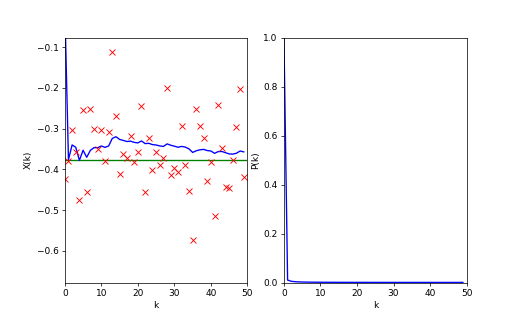

In [99]:
x = -0.37727

q = 1e-5
r = 0.01

KF = cv2.KalmanFilter(1,1,0)
KF.transitionMatrix = np.ones((1,1))
KF.measurementMatrix=np.ones((1,1))
KF.processNoiseCov = q * np.eye(1)
KF.measurementNoiseCov = r*np.eye(1)

KF.errorCovPost = np.ones((1,1))
KF.statePost = np.zeros((1,1))

N=50
z = np.random.randn(N,1)*np.sqrt(r)+x
X = [KF.statePost[0,0]]
P = [KF.errorCovPost[0,0]]

for k in range(1,N):
    predict = KF.predict()
    estimate = KF.correct(z[k])
    X.append(estimate[0,0])
    P.append(KF.errorCovPost[0,0])

plt.figure(figsize=(8,5))
imgae1=plt.subplot(1,2,1)
plt.xlabel('k')
plt.ylabel('X(k)')
plt.axis([0,N,x-3*np.sqrt(r),x+3*np.sqrt(r)])
plt.plot([0,N],[x,x],'g-')
plt.plot(X,'b-')
plt.plot(z,'rx')

imgae2=plt.subplot(1,2,2)
plt.xlabel('k')
plt.ylabel('P(k)')
plt.axis([0,N,0,1.0])
plt.plot([0,N],[x,x],'g-')
plt.plot(P,'b-')

plt.show()

<IPython.core.display.Javascript object>


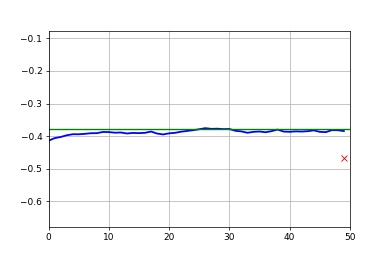

In [100]:
x = -0.37727

q = 1e-5
r = 0.01

KF = cv2.KalmanFilter(1,1,0)
KF.transitionMatrix = np.ones((1,1))
KF.measurementMatrix=np.ones((1,1))
KF.processNoiseCov = q * np.eye(1)
KF.measurementNoiseCov = r*np.eye(1)

KF.errorCovPost = np.ones((1,1))
KF.statePost = np.zeros((1,1))

N=50
z = np.random.randn(N,1)*np.sqrt(r)+x
X = [KF.statePost[0,0]]
P = [KF.errorCovPost[0,0]]

fig = plt.figure()
fig.canvas.set_window_title('Kalman Filter')
ax = plt.axes(xlim=(0,N),ylim=(x-3*np.sqrt(r),x+3*np.sqrt(r)))
ax.grid()
line1, = ax.plot([],[],'b-',lw=2)
line2, = ax.plot([],[],'rx')
line3, = ax.plot([0,N],[x,x],'g-')
xrange=np.arange(N)
Z=[]

def init():
    for k in range(N):
        predict = KF.predict()
        z = np.random.randn(1,1)*np.sqrt(r)+x
        estimate = KF.correct(z[0])
        X.append(estimate[0,0])
        Z.append(z[0][0])
    line1.set_data(xrange,X)
    line2.set_data(xrange,Z)
    return line1,line2

def animate(k):
    global X,Z
    predict = KF.predict()
    z = np.random.randn(1,1)*np.sqrt(r)+x
    estimate = KF.correct(z[0])
    
    X = X[1:N]
    X.append(estimate[0,0])
    Z = Z[1:N]
    Z.append(z[0][0])
    line1.set_data(xrange,X)
    line2.set_data([N-1],z)
    
ani = animation.FuncAnimation(fig,animate,init_func=init,interval=25,blit=True)

plt.show()

<IPython.core.display.Javascript object>


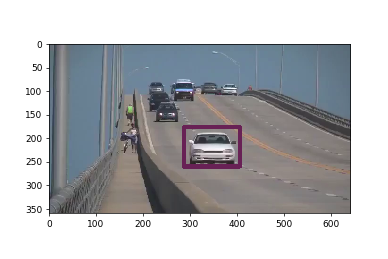

Button(description='Disconnect mpl', style=ButtonStyle())

In [112]:
cap = cv2.VideoCapture('./data/Slow.mp4')
if(not cap.isOpened()):
    print('Error opening video')
ret,frame = cap.read()

frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
bs = bbox_select(frame)

In [113]:
[x1,y1],[x2,y2] = bs.selected_points

x1 = int(x1)
y1 = int(y1)
x2 = int(x2)
y2 = int(y2)
print(x1,y1,x2,y2)

285 177 404 261


In [114]:
height,width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
roi_mask = np.zeros((height,width),dtype=np.uint8)
term_crit = (cv2.TERM_CRITERIA_MAX_ITER+cv2.TERM_CRITERIA_EPS,10,1)
t=0

hsv = cv2.cvtColor(frame,cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv,(0.,60.,32.),(180.,255.,255.))
        
mask_roi = mask[y1:y2,x1:x2]
hsv_roi = hsv[y1:y2,x1:x2]
        
hist_roi = cv2.calcHist([hsv_roi],[0],mask_roi,[16],[0,180])
cv2.normalize(hist_roi,hist_roi,0,255,cv2.NORM_MINMAX)
H1=hist_roi.copy()
cv2.normalize(H1,H1,0.0,1.0,cv2.NORM_MINMAX)
        
track_window = (x1,y1,x2-x1,y2-y1)

wImg = widgets.Image(layout = widgets.Layout(border="solid"), width="30%") 
display.display(wImg)

# Kalman Filter Setup
q = 1e-5
r=0.01
dt=1
KF=cv2.KalmanFilter(4,2,0)
KF.transitionMatrix = np.array([[1,0,dt,0],
                               [0,1,0,dt],
                               [0,0,1,0],
                               [0,0,0,1]],np.float32)
KF.measurementMatrix = np.array([[1,0,0,0],
                                [0,1,0,0]],np.float32)

count = 0
while True:
    try:
        retval, frame = cap.read()
        if not retval:
            break
        t+=1
        frame2 = frame.copy()
        hsv = cv2.cvtColor(frame,cv2.COLOR_RGB2HSV)
        
        #Kalman filter initialize
        KF.processNoiseCov = q*np.eye(4,dtype=np.float32)
        KF.measurementNoiseCov = r*np.eye(2,dtype=np.float32)
        KF.errorCovPost = np.eye(4,dtype=np.float32)
        
        x,y,w,h = track_window
        KF.statePost = np.array([[x],[y],[0.],[0.]],dtype=np.float32)
        
        predict = KF.predict()            
        backP = cv2.calcBackProject([hsv],[0],hist_roi,[0,180],1)
        backP &= mask
        
        #print('Check2',x,y,w,h)
        
        ret,track_window = cv2.meanShift(backP,track_window,term_crit)
        x,y,w,h = track_window
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),10)
            
        z = np.array([[x],[y]],dtype=np.float32)
        estimate = KF.correct(z)
        estimate = np.int32(estimate)
            
        x2,y2 = estimate[0][0],estimate[1][0]
        
        cv2.rectangle(frame,(x2,y2),(x2+w,y2+h),(255,0,0),10)
        
        wImg.value = cv2.imencode(".jpeg", frame)[1].tostring()
        
        if (x+w) >= width or (y+h)>=height:
            if count > 70:
                print('Object Deleting')
                break
            else:
                count += 1
                
    except KeyboardInterrupt:
        break
        
if cap.isOpened():
    cap.release()

Image(value=b'', layout="Layout(border='solid')", width='30%')

Object Deleting


In [103]:
wImg = widgets.Image(layout = widgets.Layout(border="solid"), width="30%") 

display.display(wImg)

src1 = cv2.imread('./data/book.PNG')
img1 = cv2.cvtColor(src1, cv2.COLOR_BGR2GRAY)
surF = cv2.xfeatures2d.SURF_create()
kp1,des1 = surF.detectAndCompute(img1,None)
flan = cv2.FlannBasedMatcher_create()

cap = cv2.VideoCapture('./data/book.mp4')
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))

nndrRatio=0.65
h,w = img1.shape
t=0


while True:
    try:
        retval, frame = cap.read()
        if not retval:
            break
        t += 1
    
        src2 = frame.copy()
        img2 = cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)
        kp2,des2 = surF.detectAndCompute(img2,None)
        
        try:
            matches = flan.knnMatch(des1,des2,k=2)
            good_matches = [f1 for f1, f2 in matches if f1.distance < nndrRatio*f2.distance]
        
            dst = cv2.drawMatches(src1,kp1,src2,kp2,good_matches,None,flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
    
        except:
            continue
            
        
        if len(good_matches) < 5:
            continue
        
        else:
            src1_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches])
            src2_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches])
            H,mask = cv2.findHomography(src1_pts,src2_pts,cv2.RANSAC,2.0)
            mask_matches = mask.ravel().tolist()
        
            if H is None:
                continue
            
            else:
                pts = np.float32([[0,0],[0,h-1],[w-1,h-1],[w-1,0]]).reshape(-1,1,2)
                pts2 = cv2.perspectiveTransform(pts,H)
                src2 = cv2.polylines(src2,[np.int32(pts2)],True,(255,0,0),2)
        
                draw_params = dict(matchColor = (0,255,0),
                          singlePointColor=None,
                          matchesMask = mask_matches,flags=2)
        
                dst = cv2.drawMatches(src1,kp1,src2,kp2,good_matches,None,**draw_params)
        
                wImg.value = cv2.imencode(".jpeg", dst)[1].tostring()
            
        
    except KeyboardInterrupt:
        break
        
if cap.isOpened():
    cap.release()

Image(value=b'', layout="Layout(border='solid')", width='30%')

<IPython.core.display.Javascript object>


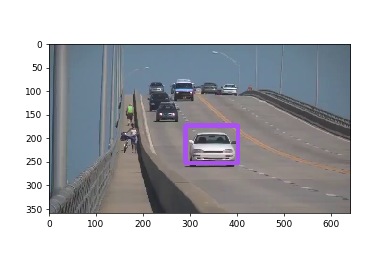

Button(description='Disconnect mpl', style=ButtonStyle())

In [115]:
cap = cv2.VideoCapture('./data/Slow.mp4')
if(not cap.isOpened()):
    print('Error opening video')
ret,frame = cap.read()

frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
bs = bbox_select(frame)

In [116]:
[x1,y1],[x2,y2] = bs.selected_points

x1 = int(x1)
y1 = int(y1)
x2 = int(x2)
y2 = int(y2)
print(x1,y1,x2,y2)

289 174 400 254


In [117]:
height,width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
roi_mask = np.zeros((height,width),dtype=np.uint8)
term_crit = (cv2.TERM_CRITERIA_MAX_ITER+cv2.TERM_CRITERIA_EPS,10,1)
t=0

hsv = cv2.cvtColor(frame,cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv,(0.,60.,32.),(180.,255.,255.))
        
mask_roi = mask[y1:y2,x1:x2]
hsv_roi = hsv[y1:y2,x1:x2]
        
hist_roi = cv2.calcHist([hsv_roi],[0],mask_roi,[16],[0,180])
cv2.normalize(hist_roi,hist_roi,0,255,cv2.NORM_MINMAX)
H1=hist_roi.copy()
cv2.normalize(H1,H1,0.0,1.0,cv2.NORM_MINMAX)
        
track_window = (x1,y1,x2-x1,y2-y1)

wImg = widgets.Image(layout = widgets.Layout(border="solid"), width="30%") 
display.display(wImg)

# Kalman Filter Setup
q = 1e-5
r=0.01
dt=1
KF=cv2.KalmanFilter(4,2,0)
KF.transitionMatrix = np.array([[1,0,dt,0],
                               [0,1,0,dt],
                               [0,0,1,0],
                               [0,0,0,1]],np.float32)
KF.measurementMatrix = np.array([[1,0,0,0],
                                [0,1,0,0]],np.float32)

count = 0
while True:
    try:
        retval, frame = cap.read()
        if not retval:
            break
        t+=1
        frame2 = frame.copy()
        hsv = cv2.cvtColor(frame,cv2.COLOR_RGB2HSV)
        
        #Kalman filter initialize
        KF.processNoiseCov = q*np.eye(4,dtype=np.float32)
        KF.measurementNoiseCov = r*np.eye(2,dtype=np.float32)
        KF.errorCovPost = np.eye(4,dtype=np.float32)
        
        x,y,w,h = track_window
        KF.statePost = np.array([[x],[y],[0.],[0.]],dtype=np.float32)
        
        predict = KF.predict()            
        backP = cv2.calcBackProject([hsv],[0],hist_roi,[0,180],1)
        backP &= mask
        
        #print('Check2',x,y,w,h)
        
        ret,track_window = cv2.meanShift(backP,track_window,term_crit)
        x,y,w,h = track_window
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),10)
            
        z = np.array([[x],[y]],dtype=np.float32)
        estimate = KF.correct(z)
        estimate = np.int32(estimate)
            
        x2,y2 = estimate[0][0],estimate[1][0]
        
        cv2.rectangle(frame,(x2,y2),(x2+w,y2+h),(255,0,0),10)
        
        wImg.value = cv2.imencode(".jpeg", frame)[1].tostring()
        
        if (x+w) >= width or (y+h)>=height:
            if count > 70:
                print('Object Deleting')
                break
            else:
                count += 1
                
    except KeyboardInterrupt:
        break
        
if cap.isOpened():
    cap.release()

Image(value=b'', layout="Layout(border='solid')", width='30%')

Object Deleting
